In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random

## 1. Табличные данные и Pandas

### 1.1 Открыть файл с таблицей и вывести последние 10 строк:

In [2]:
df = pd.read_csv('data.csv')  
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### 1.2 Ответить на вопросы:
#### а) Сколько заказов попало в выборку:

In [3]:
df.tail(10).groupby('order_id').sum()

,quantity
order_id,
1831,3
1832,2
1833,2
1834,3


#### б) Сколько уникальных категорий товара было выбрано:

In [4]:
df.tail(10).groupby('item_name').sum().quantity

item_name
Bottled Water          1
Carnitas Bowl          1
Chicken Salad Bowl     3
Chicken Soft Tacos     1
Chips                  1
Chips and Guacamole    1
Steak Burrito          2
Name: quantity, dtype: int64

### 1.3 Есть ли в данных пропуски? В каких колонках?

In [5]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

#### Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [6]:
df.fillna({'order_id':0, 'quantity':0, 'item_name':'', 'choice_description':'', 'item_price':'$0'})

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 1.4 Работа с колонкой цены товара
#### a) Создайте новую колонку так, чтобы в ней цена была числом.

In [7]:
df['item_price_new'] = pd.to_numeric(df.item_price.str.replace('$', ''), errors='coerce')

#### б) Какая средняя/минимальная/максимальная цена у товара?  

In [8]:
item_price_new_apiece = df.item_price_new/df.quantity
item_price_new_apiece.describe()

count    4622.000000
mean        7.084424
std         3.665487
min         1.090000
25%         2.950000
50%         8.750000
75%         9.250000
max        11.890000
dtype: float64

#### в) Удаление старой колонки с ценой.

In [9]:
del df['item_price']

###  1.5 Какие 5 товаров были самыми дешёвыми и самыми дорогими?
#### Удаление дубликатов, деление на количество товаров для получения цены одной штуки и сортировка. 

In [10]:
df.drop_duplicates
df.sort_values(by=['item_price_new'])
df.head(5)

,order_id,quantity,item_name,choice_description,item_price_new
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [11]:
df.tail(5)

,order_id,quantity,item_name,choice_description,item_price_new
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


### 1.6 Сколько раз клиенты покупали больше 1 Chicken Bowl?

In [12]:
len(df.loc[(df.item_name=='Chicken Bowl') & (df.quantity > 1)])

33

### 1.7 Какой средний чек у заказа? Сколько в среднем товаров покупают?

In [13]:
df.groupby('order_id').sum().mean()

quantity           2.711014
item_price_new    18.811429
dtype: float64

### 1.8 Сколько заказов содержали ровно 1 товар?

In [14]:
f = df.groupby('order_id').quantity.sum() #f = df_groupby_order_id
f.loc[f==1].sum()

56

### 1.9 Какая самая популярная категория товара?
#### *Самой популярной считается категория товара, которую заказывали самое большое число раз*

In [15]:
df.groupby('item_name').quantity.sum().idxmax()

'Chicken Bowl'

### 1.10 Burrito:
#### а) Какие виды Burrito существуют?

In [16]:
burrito = df.loc[df.item_name.str.contains('Burrito')].copy(deep=True)
list(burrito.item_name.unique())

['Steak Burrito',
 'Chicken Burrito',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Veggie Burrito',
 'Burrito']

#### б) Какой из них чаще всего покупают?

In [17]:
burrito.groupby('item_name').quantity.sum().idxmax()

'Chicken Burrito'

#### в) Какой из них самый дорогой?

In [18]:
burrito['item_price_new_apiece'] = burrito.item_price_new / burrito.quantity
burrito.groupby('item_name').item_price_new_apiece.max().idxmax()

'Barbacoa Burrito'

### 1.11 В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

In [19]:
df['item_price_new_apiece'] = df.item_price_new / df.quantity
stat = df.groupby('order_id').agg({'item_price_new':'sum', 'item_price_new_apiece':'max'})
percent = 100*stat.item_price_new_apiece / stat.item_price_new
len(percent[percent > 40.0])

1589

### 1.12 Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано товара Diet Coke. Не забывайте, что количество товара не всегда равно 1, а также не всегда цена за единицу товара равняется 1.25

In [20]:
df.loc[(df.choice_description == '[Diet Coke]') & (df.item_price_new_apiece == 1.25), 'item_price_new_apiece'] = 1.35

### 1.13 Создание DateFrame из матрицы numpy:
#### а) Создание DateFrame с колонками index, column1, column2, где index является индексом.

In [21]:
data = np.random.rand(10, 3)
df_data = pd.DataFrame(data)
df_data.columns = ['index','column1','column2']
df_data.set_index('index')

,column1,column2
index,,
0.312235,0.131474,0.324582
0.112432,0.590115,0.012089
0.426697,0.263630,0.835736
0.339351,0.279833,0.140492
0.503084,0.962980,0.933569
0.032775,0.540301,0.009316
0.827759,0.024313,0.356433
0.326161,0.002300,0.332266
0.794747,0.227026,0.346891


#### б) Сохранение DataFrame на диск в формате csv без индексов и названий столбцов.

In [22]:
df_data.to_csv('DataFrame.csv', index=False, header=False)

## 2. Визуализации и matplotlib

In [23]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

df['date'] = df.order_id.map(dates['date'])

### 2.1 Гистограмма распределения сумм покупок и гистограмма средних цен отдельных видов продуктов

In [24]:
check_per_date = df.groupby('date', as_index=False).item_price_new.sum()
check_per_date.head()

,date,item_price_new
0,2018-01-01,1119.33
1,2018-01-02,1083.00
2,2018-01-03,1251.80
3,2018-01-04,1353.34
4,2018-01-05,1142.63


In [25]:
price_per_item = df.groupby('item_name', as_index=False).item_price_new_apiece.mean()
price_per_item.head()

,item_name,item_price_new_apiece
0,6 Pack Soft Drink,6.490000
1,Barbacoa Bowl,10.187273
2,Barbacoa Burrito,9.832418
3,Barbacoa Crispy Tacos,10.087273
4,Barbacoa Salad Bowl,10.640000


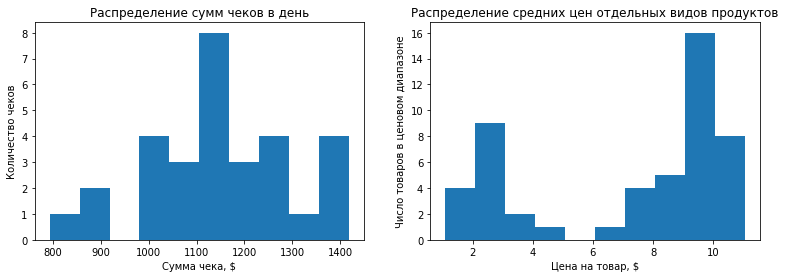

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.set_title("Распределение сумм чеков в день")
ax1.set(xlabel="Сумма чека, $", ylabel="Количество чеков")
ax1.hist(check_per_date.item_price_new)

ax2.set_title("Распределение средних цен отдельных видов продуктов")
ax2.set(xlabel="Цена на товар, $", ylabel="Число товаров в ценовом диапазоне")
ax2.hist(price_per_item.item_price_new_apiece)
plt.show()

### 2.2 График зависимости суммы покупок от дней

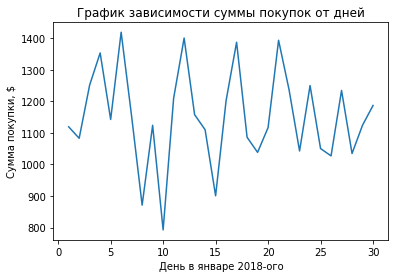

In [27]:
plt.plot(pd.to_datetime(check_per_date.date).dt.day, check_per_date.item_price_new)
plt.title('График зависимости суммы покупок от дней')
plt.xlabel('День в январе 2018-ого')
plt.ylabel('Сумма покупки, $')
plt.show()

### 2.3 График средних сумм покупок по дням недели

In [28]:
check_per_date['weekday'] = pd.to_datetime(check_per_date.date).dt.weekday
check_per_weekday = check_per_date.groupby('weekday', as_index=False).item_price_new.mean()
check_per_weekday

,weekday,item_price_new
0,0,1050.4760
1,1,1127.8620
2,2,1170.4675
3,3,1174.8825
4,4,1152.1775
5,5,1232.0275
6,6,1172.5625


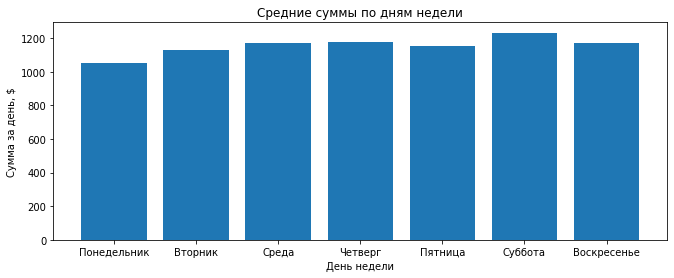

In [29]:
plt.figure(figsize=(11, 4))
day_names = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
plt.title('Средние суммы по дням недели')
plt.xlabel('День недели')
plt.ylabel('Сумма за день, $')
plt.bar([day_names[day] for day in check_per_weekday.weekday], check_per_weekday.item_price_new)
plt.show()

### 2.4 График зависимости денег за товар от купленного количества

In [30]:
table = df[['item_name','quantity', 'item_price_new_apiece']]
table.head()

,item_name,quantity,item_price_new_apiece
0,Chips and Fresh Tomato Salsa,1,2.39
1,Izze,1,3.39
2,Nantucket Nectar,1,3.39
3,Chips and Tomatillo-Green Chili Salsa,1,2.39
4,Chicken Bowl,2,8.49


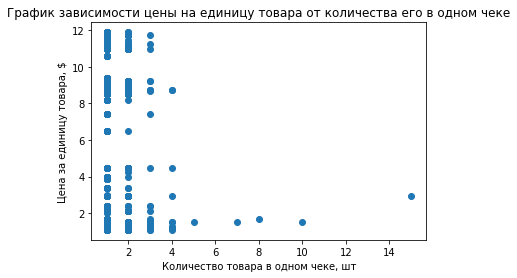

In [31]:
plt.figure()
plt.title("График зависимости цены на единицу товара от количества его в одном чеке")
plt.xlabel("Количество товара в одном чеке, шт")
plt.ylabel("Цена за единицу товара, $")
plt.scatter(table.quantity, table.item_price_new_apiece)
plt.show()

По группам точек на графике можно увидеть, как часто люди покупают определённые количества товаров в определённой ценовой категории.

Например, видно, что почти всегда люди берут не более 4 единиц одного и то же продукта в одном чеке, причём чем больше стоимость, тем менее плотным будет облако точек. Есть только одна оптовая продажа (15 единиц), причём товар был сравнительно недорогим (почти четыре доллара). Единомоментных продаж свыше 4 единиц для товаров дороже четырёх долларов не наблюдается вообще. 

### Оценка: 10 баллов